In [2]:
# 读取交易数据

# 数据一
import pandas as pd
df_transaction1030 = pd.read_csv('ndm_transaction_list_all_20231030.csv')
df_transaction1031 = pd.read_csv('ndm_transaction_list_all_20231031.csv')

/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_85901/3701971125.py:5: DtypeWarning: Columns (19,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transaction1030 = pd.read_csv('ndm_transaction_list_all_20231030.csv')
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_85901/3701971125.py:6: DtypeWarning: Columns (19,69,110) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transaction1031 = pd.read_csv('ndm_transaction_list_all_20231031.csv')


In [3]:
import pandas as pd

# Load the data from the CSV file
df_transaction = df_transaction1030
df_transaction['nmnl_vol'] = df_transaction['nmnl_vol'] / 1000000
# Group by 'bond_cd' and count transactions, then reset index
bond_transactions = df_transaction.groupby('bond_cd').size().reset_index(name='Transaction num')

# Group by 'bond_cd' and get the first 'bnds_nm' value for each group
bonds_names = df_transaction.groupby('bond_cd')['bnds_nm'].first().reset_index()

# Group by 'bond_cd' and sum 'nmnl_vol' for each group
nmnl_vol_sum = df_transaction.groupby('bond_cd')['nmnl_vol'].sum().reset_index(name='Total nmnl_vol')

# Merge the DataFrames based on 'bond_cd'
result = pd.merge(bond_transactions, bonds_names, on='bond_cd')
result = pd.merge(result, nmnl_vol_sum, on='bond_cd')

# Sort by 'Transaction num' in descending order
result = result.sort_values(by='Transaction num', ascending=False)

# Print the result
print(result)


        bond_cd  Transaction num       bnds_nm  Total nmnl_vol
217      230018              754      23附息国债18         23330.0
231      230210              462        23国开10         18930.0
230      230208              315        23国开08         10820.0
208      230009              284      23附息国债09          8340.0
218      230019              207      23附息国债19          8170.0
...         ...              ...           ...             ...
515     2371303                1      23湖南债130           100.0
1054  102280983                1   22兵国资MTN001             8.0
513     2371295                1       23福建债25            10.0
1056  102281014                1  22衡阳城投MTN002            30.0
1750  242380021                1     23建行永续债02            20.0

[1751 rows x 4 columns]


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_85901/3525783656.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['timeStamp'] = pd.to_datetime(filtered_data['dl_tm'])


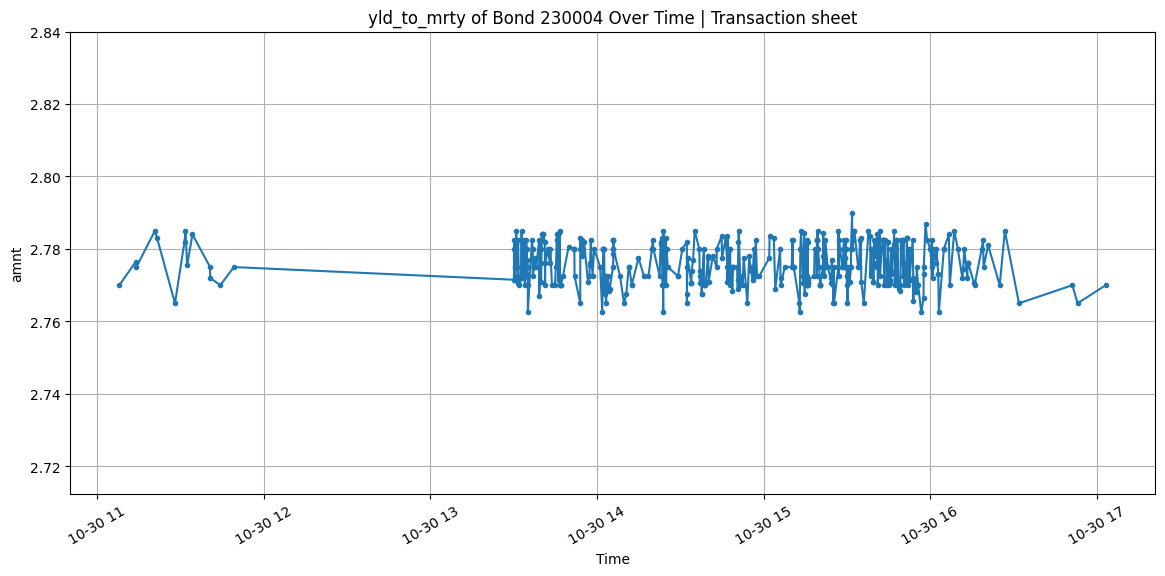

In [12]:

# AMNT
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件并筛选特定债券数据
data = df_transaction1030

# print(data['bond_cd'])
filtered_data = data[data['bond_cd'] == 230210]

# print(filtered_data)

# 转换时间戳格式
filtered_data['timeStamp'] = pd.to_datetime(filtered_data['dl_tm'])

# 排序
sorted_data = filtered_data.sort_values(by='timeStamp', ascending=True)

# 创建绘图
plt.figure(figsize=(14, 6))
plt.plot(sorted_data['timeStamp'], sorted_data['yld_to_mrty'], marker='o', markersize=3)
plt.xlabel('Time')
plt.ylabel('amnt')
plt.title('yld_to_mrty of Bond 230004 Over Time | Transaction sheet')
plt.xticks(rotation=30)
plt.grid(True)

# 调整 y 轴范围
plt.ylim(min(sorted_data['yld_to_mrty']) - 0.05, max(sorted_data['yld_to_mrty']) + 0.05)

plt.show()


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_85901/2884241467.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['timeStamp'] = pd.to_datetime(filtered_data['dl_tm'])


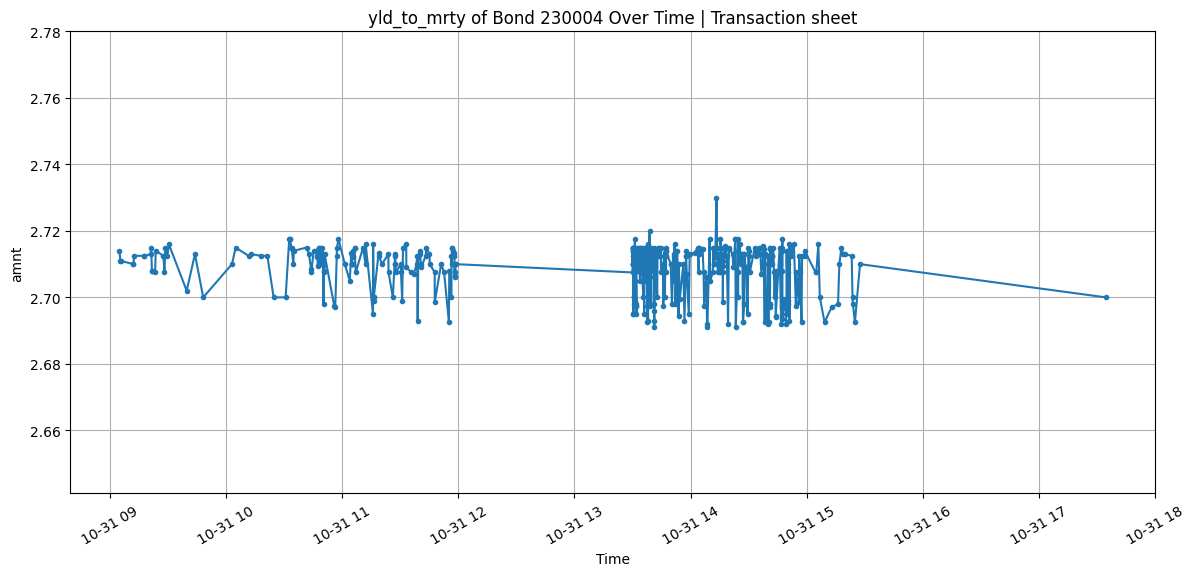

In [14]:

# AMNT
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件并筛选特定债券数据
data = df_transaction1031

# print(data['bond_cd'])
filtered_data = data[data['bond_cd'] == 230018]

# print(filtered_data)

# 转换时间戳格式
filtered_data['timeStamp'] = pd.to_datetime(filtered_data['dl_tm'])

# 排序
sorted_data = filtered_data.sort_values(by='timeStamp', ascending=True)

# 创建绘图
plt.figure(figsize=(14, 6))
plt.plot(sorted_data['timeStamp'], sorted_data['yld_to_mrty'], marker='o', markersize=3)
plt.xlabel('Time')
plt.ylabel('amnt')
plt.title('yld_to_mrty of Bond 230004 Over Time | Transaction sheet')
plt.xticks(rotation=30)
plt.grid(True)

# 调整 y 轴范围
plt.ylim(min(sorted_data['yld_to_mrty']) - 0.05, max(sorted_data['yld_to_mrty']) + 0.05)

plt.show()
